In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pathdata17zip = '/content/drive/My Drive/Code_Attribution/data17.zip'

In [0]:
import zipfile
zip_ref = zipfile.ZipFile(pathdata17zip, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
datasetPath = '/tmp/data17'

In [6]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, TensorBoard
from keras.models import Model
import keras.backend as K
import numpy as np
import os

Using TensorFlow backend.


In [0]:
lengths = []
minLength = 2000

In [0]:
def padding(fname):
    f = open(fname, "r")
    y = f.read()
    f.close()
    
    origy = y
    while (len(y) < minLength):
        y += origy
        
    f = open(fname, "w")
    f.write(y)
    f.close()
    return y

In [9]:
top_10 = [0,0,0,0,0,0,0,0,0,0]
top_dir = ['','','','','','','','','','']
for r,d,f in os.walk(datasetPath):
  for di in d:
    for r1, d1, f1 in os.walk(os.path.join(r, di)):
      _len = len(f1)
      for i, ind in enumerate(top_10):
        if _len > top_10[i]:
          top_10[i] = _len
          top_dir[i] = os.path.join(r, di)
          break
print(top_10)
print(top_dir)

[32, 32, 26, 25, 23, 21, 21, 21, 21, 21]
['/tmp/data17/simonlindholm', '/tmp/data17/Xellos', '/tmp/data17/nika', '/tmp/data17/kawaiigabrielneko', '/tmp/data17/Xylofo', '/tmp/data17/MightyBear', '/tmp/data17/abhishek1408', '/tmp/data17/LEcry', '/tmp/data17/alex.jh', '/tmp/data17/VAVAvile']


In [10]:
files = []
for di in top_dir:
  for r, d, f in os.walk(di):
    print(f)
    for fil in f:
      files.append(os.path.join(r, fil))

['fresh1.cpp', 'dice1.cpp', 'stable0.cpp', 'fashion1.cpp', 'stable1.cpp', 'stalls2.cpp', 'googlements0.cpp', 'beam1.cpp', 'mountain1.cpp', 'mountain0.cpp', 'stacks0.cpp', 'pancakes0.cpp', 'tidy0.cpp', 'fashion0.cpp', 'pony0.cpp', 'roller0.cpp', 'news1.cpp', 'pancakes1.cpp', 'dice0.cpp', 'cruise0.cpp', 'fresh0.cpp', 'news0.cpp', 'slate0.cpp', 'shoot1.cpp', 'pony1.cpp', 'beam0.cpp', 'cruise1.cpp', 'shoot0.cpp', 'stalls0.cpp', 'stalls1.cpp', 'tidy1.cpp', 'googlements1.cpp']
['codejam17_3C0.cpp', 'codejam17_2A1.cpp', 'codejam17_3A1.cpp', 'codejam17_2D0.cpp', 'codejam17_3B1.cpp', 'codejam17_2Bb0.cpp', 'codejam17_1B_A1.cpp', 'codejam17_1B_B1.cpp', 'codejam17_3B0.cpp', 'codejam17_1B_C1.cpp', 'gcj17_qual_B0.cpp', 'codejam17_1C_A0.cpp', 'codejam17_2C0.cpp', 'gcj17_qual_A0.cpp', 'gcj17_qual_A1.cpp', 'codejam17_1B_B0.cpp', 'codejam17_3D0.cpp', 'codejam17_1B_C0.cpp', 'codejam17_1C_C0.cpp', 'gcj17_qual_C0.cpp', 'codejam17_3A0.cpp', 'codejam17_1A_C0.cpp', 'codejam17_1A_A0.cpp', 'codejam17_2A0.cpp', 

In [11]:
len(files)

243

In [0]:
def rem_dir(path):
  for r, d, f in os.walk(path):
    for fil in f:
      if fil in files:
        files.remove(os.path.join(r, fil))

In [0]:
outputvar = {}
all_files = []
counter = [0]

In [0]:
def makeInOut(path, _len, counter):
  count = 0
  for r, d, f in os.walk(path):
    name = r.split('/')[-1]

    f = np.array(f)
    indices = np.arange(f.shape[0])
    np.random.shuffle(indices)
    f = f[indices]

    for fil in f:
      _fil = os.path.join(r, fil)
      if name not in outputvar.keys():
        outputvar[name] = counter[0]
        counter[0] += 1
      if _fil in files:
        all_files.append(_fil)
        if count < (0.8*_len):
          if count < (0.2*_len):
            x_val.append(_fil)
            y_val.append(outputvar[name])
          else:
            x_train.append(_fil)
            y_train.append(outputvar[name])
          count += 1
        else:
          x_test.append(_fil)
          y_test.append(outputvar[name])

In [0]:
x_train = []
x_test = []
y_train = []
y_test = []
x_val = []
y_val = []
split = 0.8

In [166]:
for i in range(0,3):
    print(i)
    lengths = []
    count = 0
    for fil in files:
        f = open(fil, "r")
        x = f.read()
        y = x.split()
        f.close()
        if(len(x) <= 100):
            files.remove(fil)
        elif len(x) == 0:
            files.remove(fil)
        elif(len(y) < minLength):
            x = padding(fil)
            lengths.append(len(x))
        else:
            lengths.append(len(x))

0
1
2


In [0]:
def check(path, counter):
  for r, d, f in os.walk(path):
    _len = len(f)
    if _len < 5:
      rem_dir(path)
    else:
      makeInOut(path, _len, counter)

In [0]:
for d in top_dir:
  check(os.path.join(r, d), counter)

In [169]:
_check = []
for x in y_train:
  if x not in _check:
    _check.append(x)
print(len(_check))
print(counter)
print(len(outputvar))

10
[10]
10


In [170]:
print(max(lengths))
print(min(lengths))
print(len(lengths))
print(len(files))

20675
2003
243
243


In [0]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [172]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

indices = np.arange(x_test.shape[0])
np.random.shuffle(indices)
x_test = x_test[indices]
y_test = y_test[indices]

indices = np.arange(x_val.shape[0])
np.random.shuffle(indices)
x_val = x_val[indices]
y_val = y_val[indices]

print(x_train[:20])
print(x_test[:10])
print(y_train[:30])
print(y_test[:10])
print(x_val[:10])
print(y_val[:10])

['/tmp/data17/simonlindholm/pony0.cpp' '/tmp/data17/LEcry/C1.cpp'
 '/tmp/data17/abhishek1408/GCJ171C_A0.cpp'
 '/tmp/data17/Xellos/codejam17_2A1.cpp' '/tmp/data17/LEcry/B1.cpp'
 '/tmp/data17/kawaiigabrielneko/amplesyrup1.cpp'
 '/tmp/data17/simonlindholm/fashion1.cpp'
 '/tmp/data17/alex.jh/PonyExpressv10.cpp' '/tmp/data17/Xylofo/gcj3a1.cpp'
 '/tmp/data17/LEcry/gcj2017C0.cpp'
 '/tmp/data17/VAVAvile/bathroomstalls1.cpp'
 '/tmp/data17/abhishek1408/GCJ171C_C0.cpp'
 '/tmp/data17/alex.jh/BathroomStalls1.cpp'
 '/tmp/data17/MightyBear/RollerCoaster1.cpp'
 '/tmp/data17/VAVAvile/tidynumbers1.cpp'
 '/tmp/data17/Xellos/codejam17_1C_C0.cpp'
 '/tmp/data17/alex.jh/StableNeighbors1.cpp'
 '/tmp/data17/MightyBear/OversizePancake1.cpp'
 '/tmp/data17/simonlindholm/fresh0.cpp' '/tmp/data17/LEcry/BBB1.cpp']
['/tmp/data17/simonlindholm/roller0.cpp'
 '/tmp/data17/simonlindholm/news0.cpp'
 '/tmp/data17/abhishek1408/GCJ17B0.cpp'
 '/tmp/data17/kawaiigabrielneko/beaming0.cpp'
 '/tmp/data17/VAVAvile/parentingpartner

In [173]:
vocab = {}
count = [0]
for fil in all_files:
  f = open(fil)
  x = f.read()
  for line in x:
    for letter in line:
      if letter not in vocab.keys():
        vocab[letter] = count[0]
        count[0] += 1 
print(count)

[94]


In [0]:
def getFiles(path):
    matrix = []
    for p in path:
        tmp = np.zeros((50, 40), dtype = int)
        f = open(p)
        for i in range(0,50):
            for j in range(0, 40):
                tmp[i][j] = vocab[f.read(1)]
        matrix.append(tmp)
    return np.array(matrix)

In [0]:
num_classes = len(outputvar)
input_shape = (50, 40)
batch_size = 32
def data_generator(file_paths, author_numbers):
    batch_start = 0
    batch_end = batch_start + batch_size
    n = file_paths.shape[0]
    indexes = np.arange(0, n, batch_size)
    if n % batch_size != 0:
        indexes = indexes[:-1] 
    while True:
        np.random.shuffle(indexes)
        for ind in indexes:
            batch_start = ind
            batch_end = batch_start + batch_size
            myFiles = file_paths[batch_start:batch_end]
            batch_files = getFiles(myFiles)
            batch_authors = author_numbers[batch_start:batch_end]
            batch_x = np.zeros((batch_size, 50, 40))
            tmp = np.zeros((batch_size, num_classes))
            batch_x = np.array( batch_files )
            for i, j in enumerate(batch_authors):
                tmp[i][j] = 1
            batch_y = np.array( tmp )
            yield( batch_x, batch_y )

In [0]:
input_fil = Input(shape=(input_shape), name='input_fil')
conv = Conv1D(64, kernel_size=7, strides = 2,  activation='relu')(input_fil)
maxP = MaxPooling1D()(conv)
flat = Flatten()(maxP)
output_class = Dense(num_classes, activation='softmax')(flat)

model = Model(inputs=input_fil, outputs=output_class)

In [177]:
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_fil (InputLayer)       (None, 50, 40)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 22, 64)            17984     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 704)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7050      
Total params: 25,034
Trainable params: 25,034
Non-trainable params: 0
_________________________________________________________________


In [0]:
train_gen = data_generator(x_train, y_train)
test_gen = data_generator(x_test, y_test)
val_gen = data_generator(x_val, y_val)

In [179]:
hist1 = model.fit_generator(train_gen, epochs=40, steps_per_epoch=len(y_train)//batch_size, 
                           validation_data=val_gen, validation_steps=len(y_val)//batch_size, verbose=1)

Epoch 1/40
4/4 [==============================] - 1s 336ms/step - loss: 12.1611 - acc: 0.1641 - val_loss: 10.4799 - val_acc: 0.2812
Epoch 2/40
4/4 [==============================] - 0s 14ms/step - loss: 10.1332 - acc: 0.2734 - val_loss: 9.7001 - val_acc: 0.3438
Epoch 3/40
4/4 [==============================] - 0s 13ms/step - loss: 8.3197 - acc: 0.4141 - val_loss: 8.7531 - val_acc: 0.4062
Epoch 4/40
4/4 [==============================] - 0s 44ms/step - loss: 8.1732 - acc: 0.4609 - val_loss: 7.4469 - val_acc: 0.4688
Epoch 5/40
4/4 [==============================] - 0s 52ms/step - loss: 7.4947 - acc: 0.4844 - val_loss: 6.6539 - val_acc: 0.5000
Epoch 6/40
4/4 [==============================] - 0s 50ms/step - loss: 6.9392 - acc: 0.5625 - val_loss: 6.5135 - val_acc: 0.5000
Epoch 7/40
4/4 [==============================] - 0s 50ms/step - loss: 6.8179 - acc: 0.5703 - val_loss: 6.7425 - val_acc: 0.4688
Epoch 8/40
4/4 [==============================] - 0s 56ms/step - loss: 6.8013 - acc: 0.5781 -

In [180]:
xtestdata = getFiles(x_test)
print(xtestdata.shape)

(46, 50, 40)


In [0]:
# from keras.models import load_model
# bestModel = '/content/drive/My Drive/Code_Attribution/best.h5'
# model = load_model(bestModel)

In [182]:
preds = model.predict(xtestdata)
print(preds.shape)

(46, 10)


In [183]:
myPreds = []
for i in preds:
    myPreds.append(np.argmax(i))
myPreds = np.array(myPreds)
print(myPreds.shape)

(46,)


In [184]:
count = 0
for i in range(myPreds.shape[0]):
    if myPreds[i] == y_test[i]:
        count += 1

acc = (count / myPreds.shape[0]) * 100
print("Accuracy", acc)

Accuracy 60.86956521739131


In [185]:
outputvar

{'LEcry': 7,
 'MightyBear': 5,
 'VAVAvile': 9,
 'Xellos': 1,
 'Xylofo': 4,
 'abhishek1408': 6,
 'alex.jh': 8,
 'kawaiigabrielneko': 3,
 'nika': 2,
 'simonlindholm': 0}

In [186]:
import pandas as pd

names = list(outputvar.keys())
values = list(outputvar.values())
pd.DataFrame.from_dict({'Values': values, 'Names': names})

,Values,Names
0,0,simonlindholm
1,1,Xellos
2,2,nika
3,3,kawaiigabrielneko
4,4,Xylofo
5,5,MightyBear
6,6,abhishek1408
7,7,LEcry
8,8,alex.jh
9,9,VAVAvile


In [0]:
from mlxtend.evaluate import confusion_matrix

y_target = y_test
y_predicted = myPreds

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)
# cm

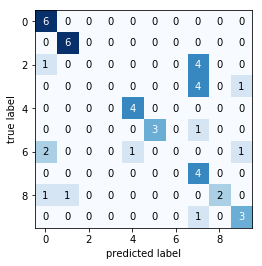

In [188]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()